Enter laptop inches: 13
Enter laptop RAM (GB): 8
Predicted Price: 64974.61


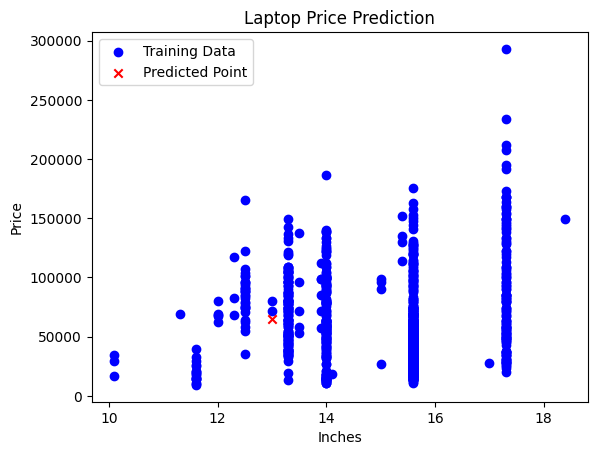

Mean Squared Error (Cost Function): 95884772.43379684
Coefficient beta_0 (intercept): -6152.5982787036555
Coefficient beta_1 (Ram): 6189.111055369518
Coefficient beta_2 (Inches): 827.1703541824481


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionModel:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b @ self.theta

# File path
file_path = '/content/laptop_data.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
    exit()

# Load data
df = pd.read_csv(file_path)

# Preprocess data
try:
    X = df[['Inches', 'Ram']].copy()
    X['Ram'] = X['Ram'].replace('[^\d.]', '', regex=True).astype(float)  # Remove non-numeric chars
    y = df['Price'].values
except KeyError as e:
    print(f"Missing expected column in dataset: {e}")
    exit()

# Train-test split
np.random.seed(2)
mask = np.random.rand(len(df)) < 0.8
X_train, y_train = X[mask], y[mask]
X_test, y_test = X[~mask], y[~mask]

# Convert to NumPy arrays
X_train, y_train = X_train.values, y_train
X_test, y_test = X_test.values, y_test

# Train the model
lr_model = LinearRegressionModel()
lr_model.fit(X_train, y_train)

# Predict for new input
try:
    inches_input = float(input("Enter laptop inches: "))
    ram_input = float(input("Enter laptop RAM (GB): "))
except ValueError:
    print("Invalid input. Please enter numeric values.")
    exit()

new_laptop_specifications = np.array([inches_input, ram_input]).reshape(1, -1)
predicted_price = lr_model.predict(new_laptop_specifications)[0]

print(f"Predicted Price: {predicted_price:.2f}")

# Visualization
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')
plt.scatter([inches_input], [predicted_price], color='red', label='Predicted Point', marker='x')
plt.title('Laptop Price Prediction')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.legend()
plt.show()

# Validate coefficients on a predefined dataset
X_train_custom = np.array([
    [1, 8, 13.3],
    [1, 8, 13.3],
    [1, 2, 11.6],
    [1, 16, 17.3],
    [1, 16, 12.5],
    [1, 8, 12],
    [1, 8, 15.6],
    [1, 2, 14],
    [1, 4, 15],
    [1, 2, 14]
])

y_train_custom = np.array([
    71378.6832,
    47895.5232,
    9270.72,
    103842.2,
    91288,
    68145,
    67772.16,
    12201.12,
    27119.52,
    12201.12
])

# Calculate coefficients
beta = np.linalg.inv(X_train_custom.T @ X_train_custom) @ X_train_custom.T @ y_train_custom
beta_0, beta_1, beta_2 = beta

# Calculate predicted prices and error
predicted_prices = X_train_custom @ beta
mean_squared_error = np.mean((predicted_prices - y_train_custom) ** 2)

print("Mean Squared Error (Cost Function):", mean_squared_error)
print("Coefficient beta_0 (intercept):", beta_0)
print("Coefficient beta_1 (Ram):", beta_1)
print("Coefficient beta_2 (Inches):", beta_2)
